In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Dense # the two types of neural network layer we will be using
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values

from glob import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import os

df_train = pd.read_csv('C://Users//MSI-pc//Desktop//Input//train_labels.csv')
df_test = pd.read_csv('C://Users//MSI-pc//Desktop//Input//sample_submission.csv')

TRAIN_DIR = 'C://Users//MSI-pc//Desktop//Input//Train//'
TEST_DIR = 'C://Users//MSI-pc//Desktop//Input//Test//'

print(os.listdir("C:\\Users\\MSI-pc\\Desktop\\Input"))
print('Train Images = ',len(os.listdir(TRAIN_DIR)))
print('Test Images = ',len(os.listdir(TEST_DIR)))
print('Shape of train DataFrame',df_train.shape)
print('Shape of test DataFrame',df_test.shape)
print(df.head())




['sample_submission.csv', 'Test', 'Train', 'train_labels.csv']
Train Images =  220026
Test Images =  57458
Shape of train DataFrame (220025, 2)
Shape of test DataFrame (57458, 2)
                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0


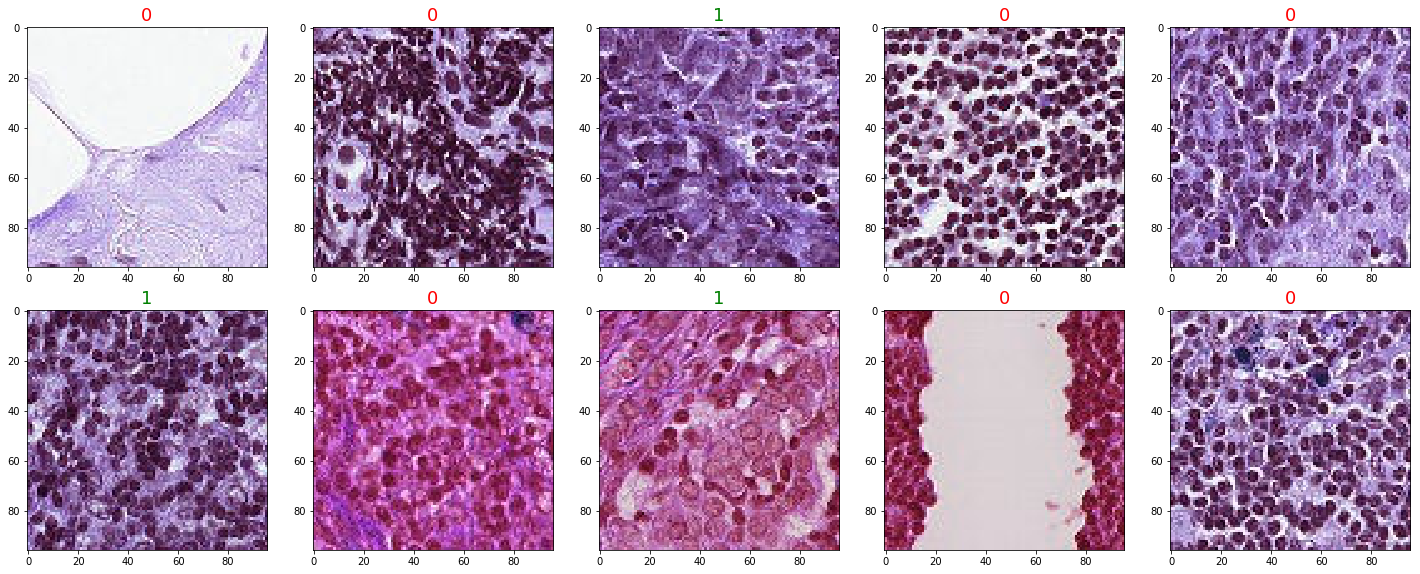

In [29]:
fig = plt.figure(figsize = (20,8))
index = 1
for i in np.random.randint(low = 0, high = df.shape[0], size = 10):
    file = TRAIN_DIR + df.iloc[i]['id'] + '.tif'
    img = cv2.imread(file)
    ax = fig.add_subplot(2, 5, index)
    ax.imshow(img, cmap = 'gray')
    index = index + 1
    color = ['green' if df.iloc[i].label == 1 else 'red'][0]
    ax.set_title(df.iloc[i].label, fontsize = 18, color = color)
plt.tight_layout()
plt.show()

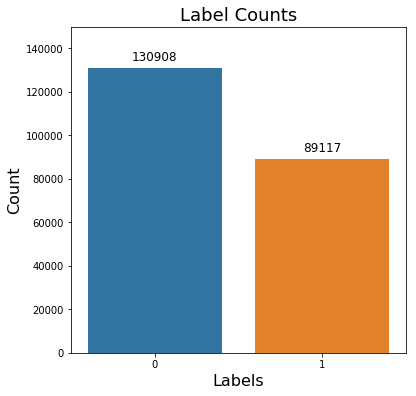

In [27]:
fig = plt.figure(figsize = (6,6)) 
ax = sns.countplot(df.label).set_title('Label Counts', fontsize = 18)
plt.annotate(df.label.value_counts()[0],
            xy = (0,df.label.value_counts()[0] + 2000),
            va = 'bottom',
            ha = 'center',
            fontsize = 12)
plt.annotate(df.label.value_counts()[1],
            xy = (1,df.label.value_counts()[1] + 2000),
            va = 'bottom',
            ha = 'center',
            fontsize = 12)
plt.ylim(0,150000)
plt.ylabel('Count', fontsize = 16)
plt.xlabel('Labels', fontsize = 16)
plt.show()


In [28]:
# removing this image because it caused a training error previously
df_train[df_train["id"] != "dd6dfed324f9fcb6f93f46f32fc800f2ec196be2"]

# removing this image because it's black
df_train[df_train["id"] != "9369c7278ec8bcc6c880d99194de09fc2bd4efbe"]
df_train.head()

id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0

In [32]:
# MNIST classification model

batch_size = 128 # in each iteration, we consider 128 training examples at once
num_epochs = 20 # we iterate twenty times over the entire training set
hidden_size = 512 #  there will be 512 neurons in both hidden layers

num_train = 6000 # there are 60000 training examples 
num_test = 1000 # there are 10000 test examples 

height, width, depth = 96, 96, 3 
num_classes = 2 # there are 2 classes (0 or 1)

X_train = np.zeros((6000,27648))
y_train = np.zeros(6000)

X_test = np.zeros((1000,27648))
y_test = np.zeros(1000)


for i in range (0,6000):
    file1 = TRAIN_DIR + df_train.iloc[i]['id'] + '.tif'
    a = cv2.imread(file1)
    X_train[i] = a.reshape(1,27648)
    y_train[i] = df_train.iloc[i]['label']
    
for i in range (0,1000):
    file2 = TEST_DIR + df_test.iloc[i]['id'] + '.tif'
    b = cv2.imread(file2)
    X_test[i] = b.reshape(1,27648)
    y_test[i] = df_test.iloc[i]['label']
    
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255 # Normalise data to [0, 1] range
X_test /= 255 # Normalise data to [0, 1] range

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes)

inp = Input(shape=(height * width * depth,)) # Our input is a 1D vector of size 96 x 96 x 3
hidden_1 = Dense(hidden_size, activation = 'relu')(inp) # First hidden ReLU layer
hidden_2 = Dense(hidden_size, activation = 'relu')(hidden_1) # Second hidden ReLU layer
out = Dense(num_classes, activation = 'softmax')(hidden_2) # Output softmax layer

model = Model(input = inp, output = out) # To define a model, just specify its inputand output layers
model.compile(loss = 'categorical_crossentropy', # using the cross-entropy loss function
              optimizer = 'adam', # using the Adam optimiser
              metrics = ['accuracy']) # reporting t

model.fit(X_train, Y_train, # Train the model using the training set...
          batch_size=batch_size, nb_epoch=num_epochs,
          verbose = 1, validation_split = 0.1) # ...holding out 10% of the data for validation
model.evaluate(X_test, Y_test, verbose = 1) 
    



D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 5400 samples, validate on 600 samples
Epoch 1/20


InternalError: GPU sync failed

(6000, 27648)